## 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

Feature Data 지정하기<br>
Label Data 지정하기<br>
Target Names 출력해 보기<br>
데이터 Describe 해 보기<br>

## 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기<br>
Random Forest 사용해 보기<br>
SVM 사용해 보기<br>
SGD Classifier 사용해 보기<br>
Logistic Regression 사용해 보기<br>


## 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data = load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### Feature Data 지정

In [3]:
digit_df = pd.DataFrame(data.data, columns=data.feature_names)
digit_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Label Data 지정

In [4]:
digit_label= pd.DataFrame(data.target, columns=['label'])
digit_label

,label
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


### Target Name

In [5]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Describe

In [6]:
digit_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [7]:
digit_label.describe()

,label
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


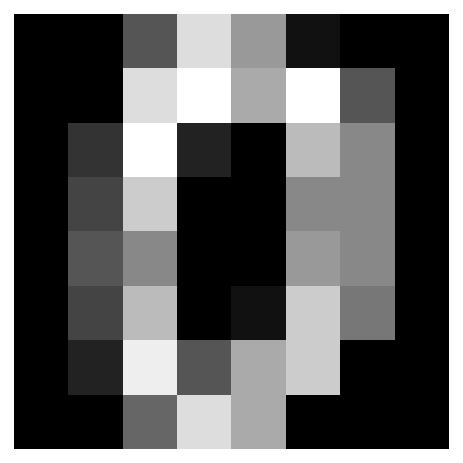

In [8]:
plt.imshow(data.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

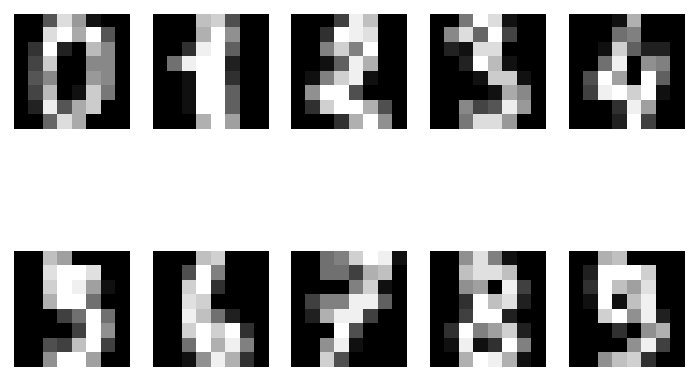

In [9]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(data.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
    
plt.show()

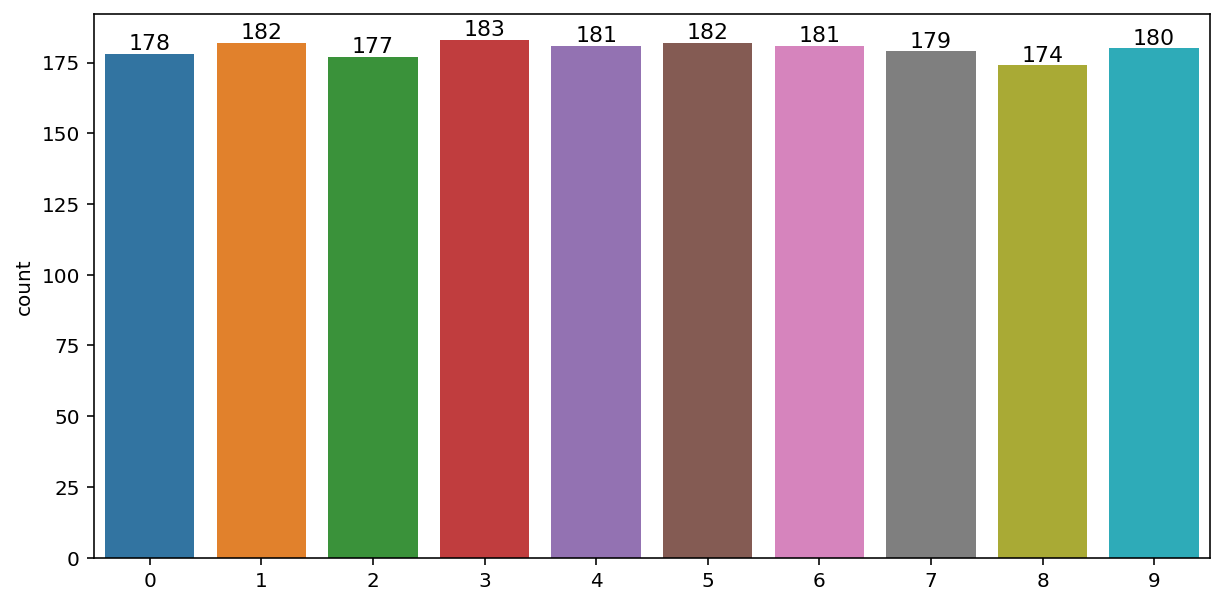

In [10]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=data.target, data=digit_df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


데이터가 균형적이다는것을 확인

### train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digit_df,
                                                   digit_label,
                                                    test_size=0.2,
                                                   random_state=205)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 1), (360, 1))

## Base line

### Decision Tree 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=205)
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree 모델의 정확도:", round(accuracy_dt * 100, 2), "%")


Decision Tree 모델의 정확도: 85.83 %


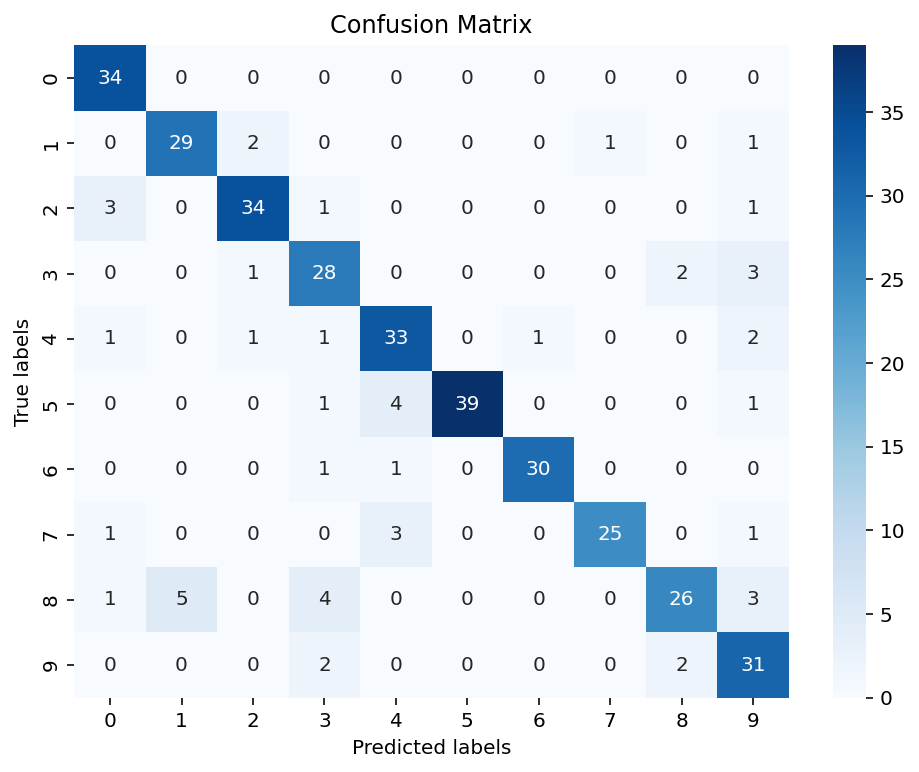

In [14]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       0.85      0.88      0.87        33
           2       0.89      0.87      0.88        39
           3       0.74      0.82      0.78        34
           4       0.80      0.85      0.83        39
           5       1.00      0.87      0.93        45
           6       0.97      0.94      0.95        32
           7       0.96      0.83      0.89        30
           8       0.87      0.67      0.75        39
           9       0.72      0.89      0.79        35

    accuracy                           0.86       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



### Random Forest 

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=205)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest 모델의 정확도:", round(accuracy_rf * 100, 2), "%")

Random Forest 모델의 정확도: 95.56 %


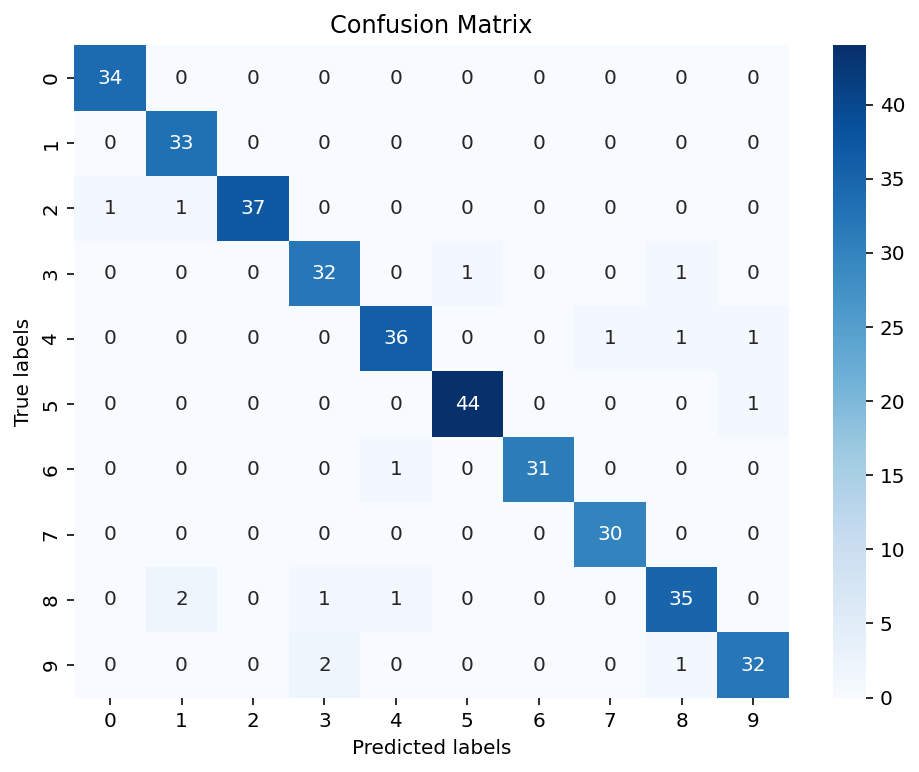

In [17]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.92      1.00      0.96        33
           2       1.00      0.95      0.97        39
           3       0.91      0.94      0.93        34
           4       0.95      0.92      0.94        39
           5       0.98      0.98      0.98        45
           6       1.00      0.97      0.98        32
           7       0.97      1.00      0.98        30
           8       0.92      0.90      0.91        39
           9       0.94      0.91      0.93        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### SVM

In [19]:
from sklearn import svm
svm_model = svm.SVC(random_state=205)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM 모델의 정확도:", round(accuracy_svm * 100, 2), "%")

SVM 모델의 정확도: 97.78 %


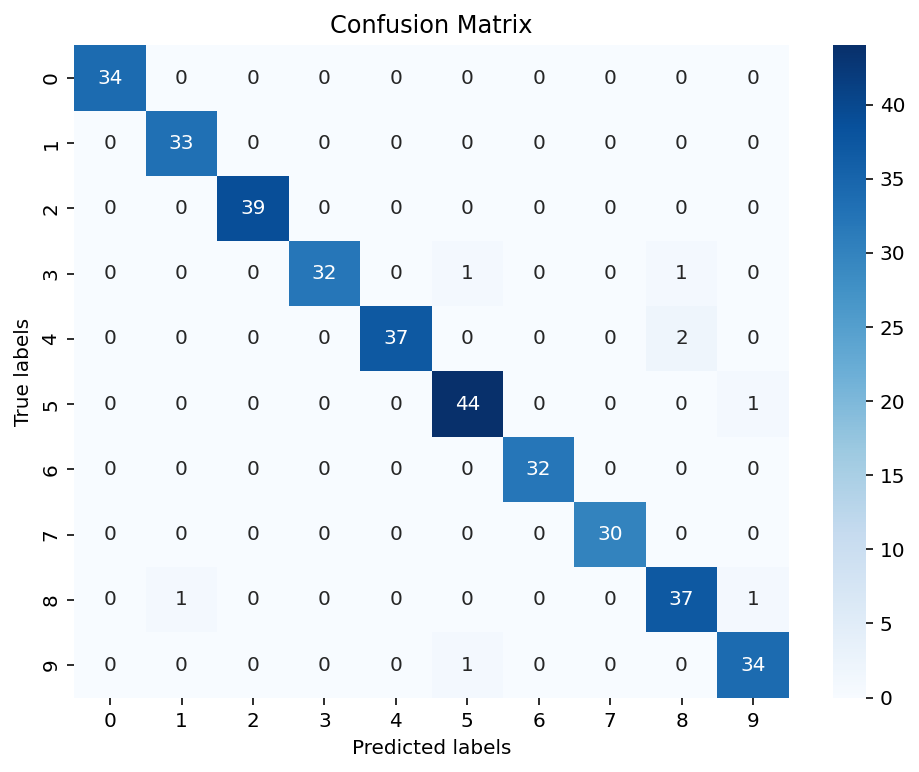

In [20]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        39
           3       1.00      0.94      0.97        34
           4       1.00      0.95      0.97        39
           5       0.96      0.98      0.97        45
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        30
           8       0.93      0.95      0.94        39
           9       0.94      0.97      0.96        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### SGD Classifier

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=205)

sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD 모델의 정확도:", round(accuracy_sgd * 100, 2), "%")

SGD 모델의 정확도: 93.61 %


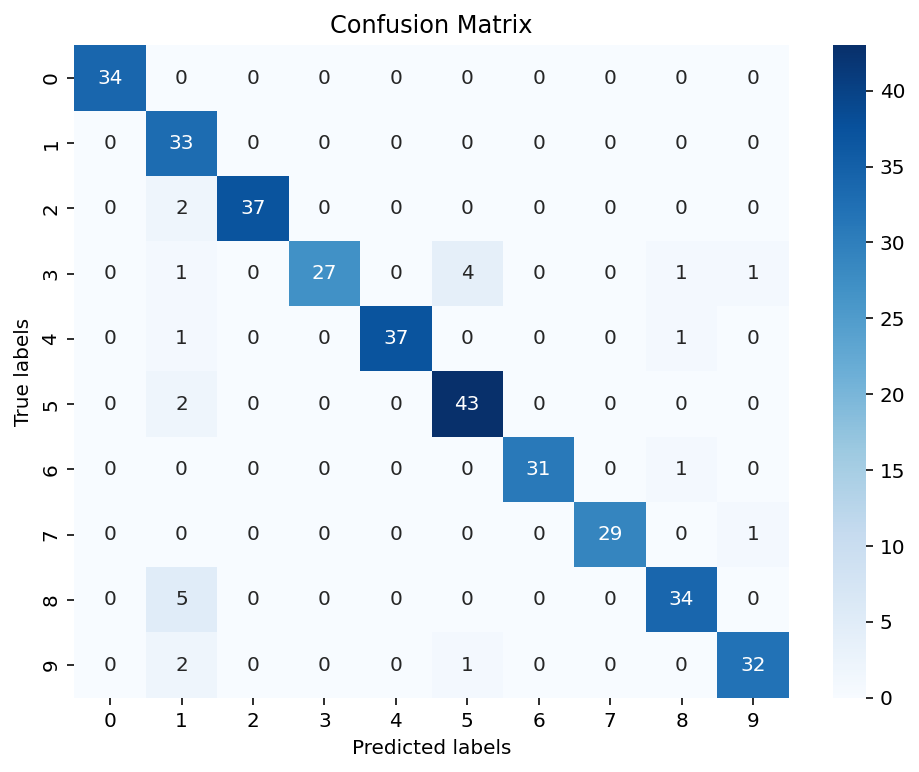

In [23]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_sgd)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.72      1.00      0.84        33
           2       1.00      0.95      0.97        39
           3       1.00      0.79      0.89        34
           4       1.00      0.95      0.97        39
           5       0.90      0.96      0.92        45
           6       1.00      0.97      0.98        32
           7       1.00      0.97      0.98        30
           8       0.92      0.87      0.89        39
           9       0.94      0.91      0.93        35

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=205)

logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("SGD 모델의 정확도:", round(accuracy_lr * 100, 2), "%")

SGD 모델의 정확도: 95.56 %


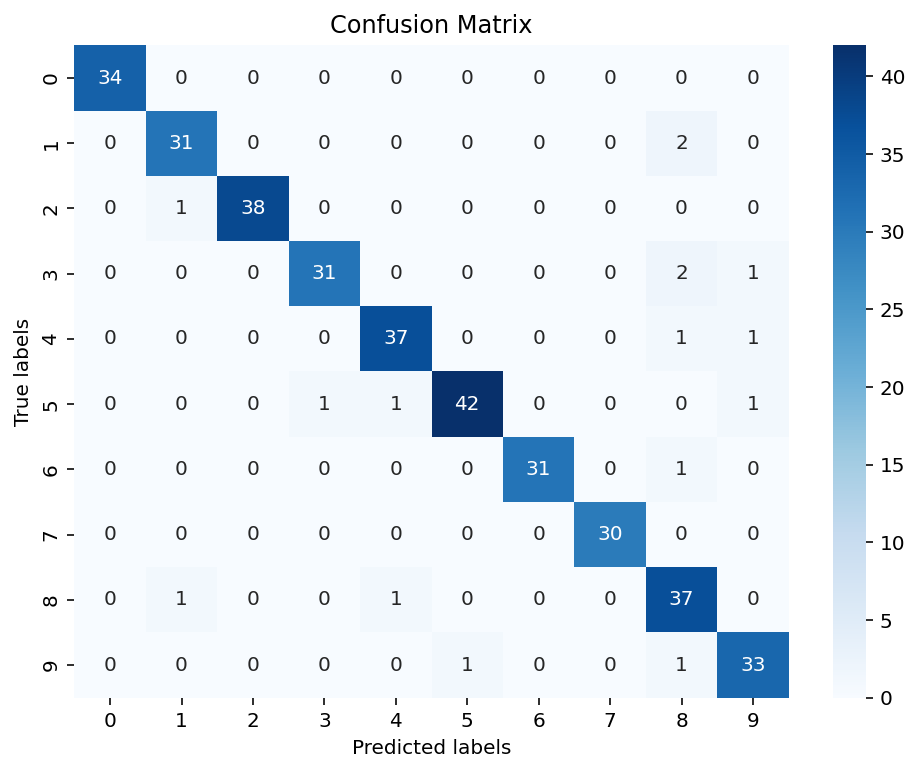

In [26]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.94      0.94        33
           2       1.00      0.97      0.99        39
           3       0.97      0.91      0.94        34
           4       0.95      0.95      0.95        39
           5       0.98      0.93      0.95        45
           6       1.00      0.97      0.98        32
           7       1.00      1.00      1.00        30
           8       0.84      0.95      0.89        39
           9       0.92      0.94      0.93        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



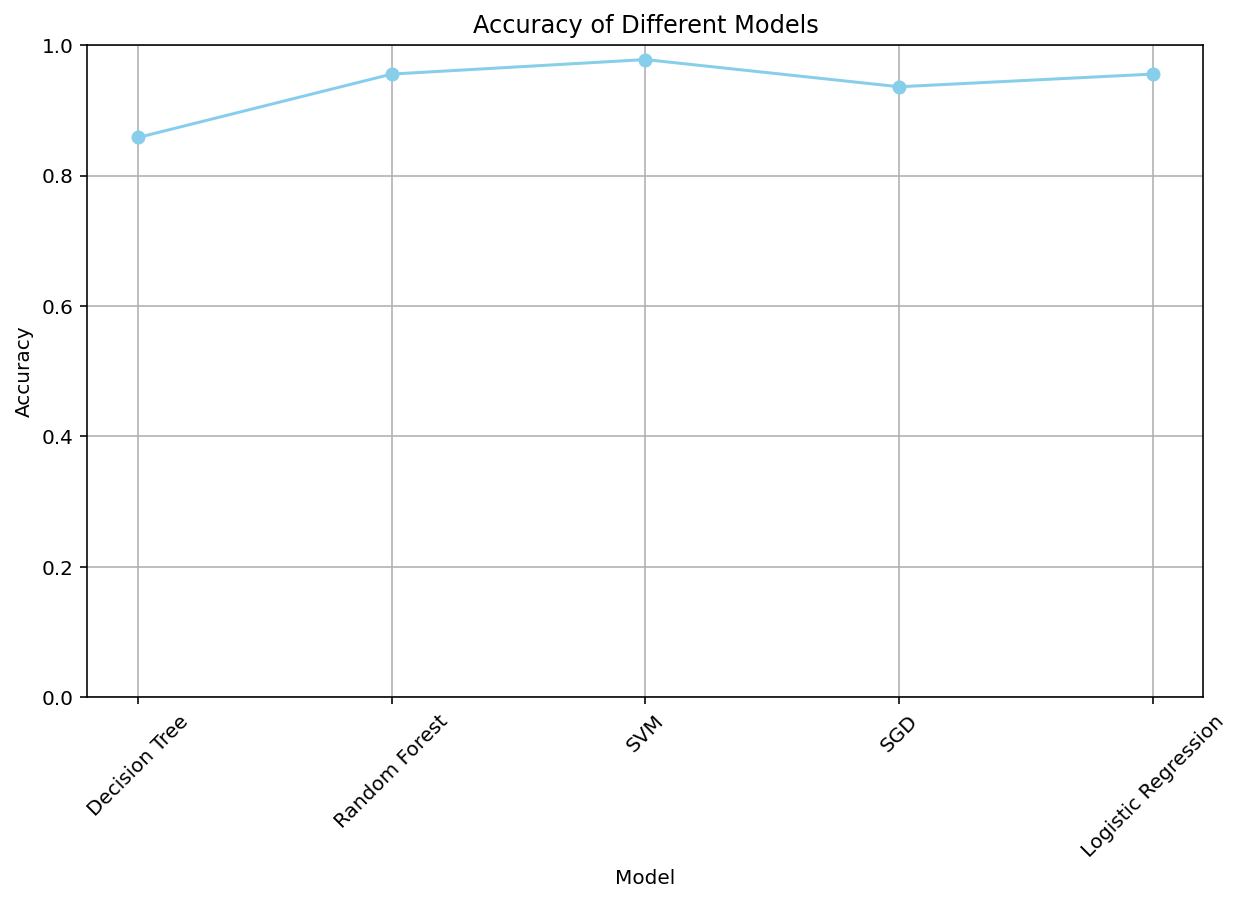

In [29]:
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic Regression']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_sgd, accuracy_lr]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # y-axis 범위를 0에서 1로 설정하여 정확도를 표시
plt.xticks(rotation=45)  # x 축 레이블을 45도로 회전
plt.grid(True)  # 그리드 추가
plt.show()

## 모델 평가
다양한 모델을 학습하고 평가지표를 보았습니다.<br>
각 클래스간의 데이터가 균형적이라서 정확도와 혼동 행렬를 함께 고려해보는게 좋아보입니다.<br>
SVM 모델에 정확도를 평가지표와 혼동행렬을 보는게 가장 좋아보입니다.

In [30]:
print("SVM 모델의 정확도:", round(accuracy_svm * 100, 2), "%")

SVM 모델의 정확도: 97.78 %


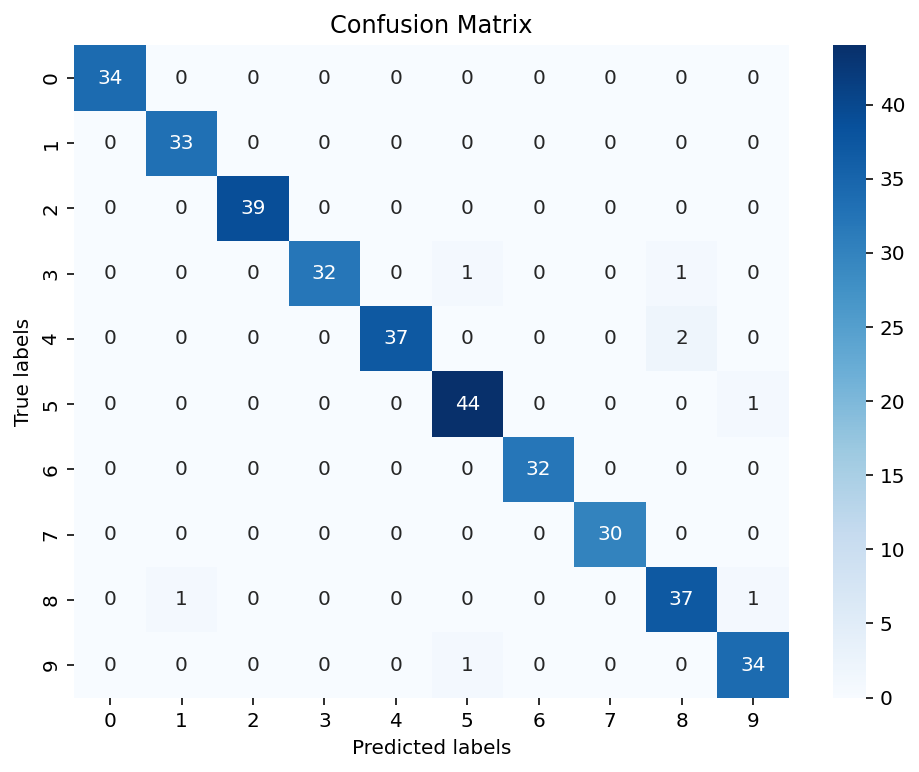

In [31]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()